Prepared by: Ömer Coşkun <br>
*Quick note: This notebook is prepared to show how an acceptable solution should look like. Better solutions are always possible.*                         

<center><h1>bogaziciAI Winter Camp</h1></center>
<center><h2>Workshop 3 Solution</h2></center>

<center><h3>Grading Table</h3></center>

|             | Part 1 | Part 2      | Total |
| ----------- | ----------- | -----------| ----------- |
| **Points**      | 50          | 50    | 100   |

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, preprocessing, model_selection, neighbors, cluster
from sklearn.preprocessing import StandardScaler
from matplotlib.pyplot import cm
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
from sklearn.model_selection import train_test_split
import pandas as pd

# Part 1 - K Nearest Neighbors

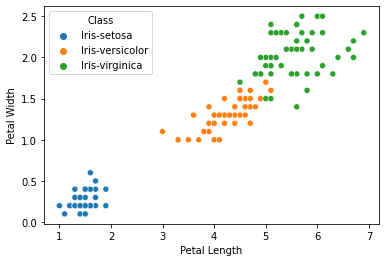

In [2]:
df = pd.read_csv('iris.data',names=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Class'])
sns.scatterplot('Petal Length', 'Petal Width', data=df, hue='Class')
plt.show()

### Step 1

Split the dataset into train and test sets.

In [3]:
x = df.iloc[:,:-1].values
y = df.iloc[:, -1].values
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.25, random_state=1)

### Step 2

Standardize the dataset

In [4]:
scaler = preprocessing.StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### Step 3

Write your custom KNN class

In [5]:
class CustomKNN:
    def __init__(self, k):
        self.k = k
    
    def fit(self, X, y):
        self.X = X
        self.y = y
        
    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return predictions

    def _predict(self, x):
        distances = [self.euclidean_distance(x, p) for p in self.X]
        indices = np.argsort(distances)[:self.k]
        labels = [self.y[i] for i in indices]
        return max(set(labels), key = labels.count)
    
    def score(self, pred, y):
        return sum([1 for i,j in zip(pred, y) if i ==j]) / len(y)
        
    def euclidean_distance(self, x1, x2):
        return (((x1 - x2)**2).sum())**0.5

### Step 4

Fit the training data to model

In [6]:
knn = CustomKNN(2)
knn.fit(x_train, y_train)

### Step 5

Evaluate the accuracy

In [7]:
pred = knn.predict(x_test)
knn.score(pred, y_test)

0.9736842105263158

### Step 6

Use sklearn's KNN classifier and compare the results

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [9]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train, y_train)
knn.score(x_test, y_test)

0.9736842105263158

### Step 7

We have gathered 5 unknown samples below. Predict which sample belongs to which category. <br>
*Hint: You can use classifier.predict(x) method.* <br>
**Extra:** Indicate the probability of prediction.


| Sepal Length | Sepal Width | Petal Length | Petal Width | Class | 
| :-: | :-: | :-: | :-: | :-: |
| 4.5 | 3.0 | 1.5 | 0.5 | Unknown |
| 7.0 | 3.0 | 5.0 | 1.5 | Unknown |
| 6.0 | 2.5 | 5.0 | 2.0 | Unknown |
| 7.0 | 3.0 | 4.5 | 1.0 | Unknown |
| 6.0 | 2.0 | 5.0 | 1.5 | Unknown |

In [10]:
x_new = [[4.5, 3.0, 1.5, 0.5], [7.0, 3.0, 5.0, 1.5], [6.0, 2.5, 5.0, 2.0], [7.0, 3.0, 4.5, 1.0], [6.0, 2.0, 5.0, 1.5]]
x_new = scaler.transform(x_new)
prediction = knn.predict(x_new)
proba = knn.predict_proba(x_new)
print("predictions:", prediction)
print("probabilities:", proba)

predictions: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor']
probabilities: [[1.  0.  0. ]
 [0.  1.  0. ]
 [0.  0.  1. ]
 [0.  1.  0. ]
 [0.  0.5 0.5]]


# Part 2 - K-Means Clustering

## Dataset
<br>
We use dataset from https://www.kaggle.com/kandij/mall-customers throughout this notebook.

In [11]:
df = pd.read_csv("segmented_customers.csv")
df["Gender"] = df["Gender"].replace({"Male": 0, "Female": 1})
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


### Step 1
<br>
For this part, we will only use Age and Spending Score columns.
<br>
Plot the dataframe so that "Age" column is on the x axis and "Spending Score (1-100)" is on the y axis.

Text(0, 0.5, 'Spending Score')

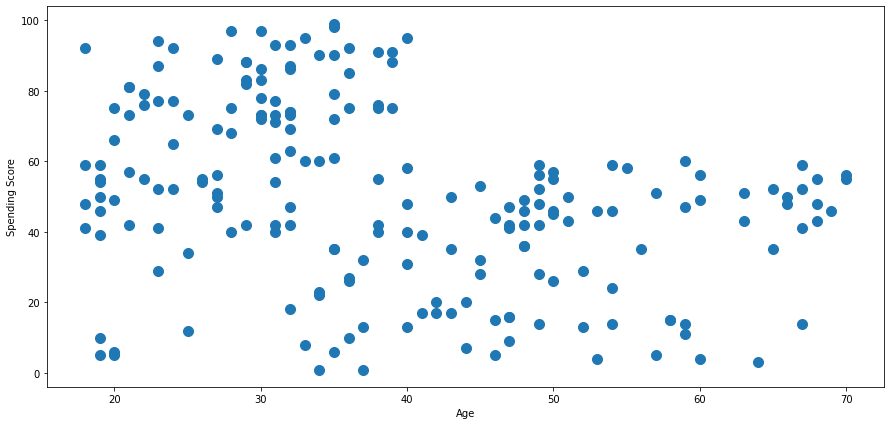

In [12]:
plt.figure(1 , figsize = (15 , 7))
plt.scatter( x = 'Age', y = 'Spending Score (1-100)', data = df, s = 100)
plt.xlabel('Age')
plt.ylabel('Spending Score')

### Step 2
<br>
Implement your own simple Kmeans algorithm without using pre-implemented libraries for KMeans. You can 
refer to the structure below while structuring your code. You do not have to use the same structure. 
Any type of initialization method for your centroids is accepted. You will solely be graded on whether or not your algorithm performs as expected, we will not take the accuracy into account as long as the algorithm gives meaningful results.

In [13]:
def assign_clusters(data, centroids):
    clusters = [[] for _ in range(len(centroids))]
    for point in data:
        i = np.argmin([(((centroid - point)**2).sum())**0.5 for centroid in centroids])
        clusters[i].append(point)
    return clusters

def update_centroids(clusters):
    centroids = []
    for cluster in clusters:
        centroid = np.array(cluster).mean(axis=0)
        centroids.append(centroid)
    return centroids
        
def k_means(data, K=5):
    centroids = [data[i] for i in np.random.choice(len(data), size=K, replace=False)]
    previous_centroids = []
    clusters = assign_clusters(data, centroids)
    while not np.array_equal(previous_centroids, centroids):
        previous_centroids = centroids.copy()
        centroids = update_centroids(clusters)
        clusters = assign_clusters(data, centroids)
    return centroids, clusters

### Step 3
<br>
After you complete your algorithm, test it for number of clusters between 1-15. Use elbow method to decide on the
best number of clusters. For the best number of clusters you chose, visualize the clusters and centroids. Comment on your results, what improvements can be made on the algorithm?

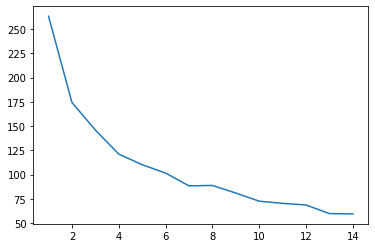

In [14]:
def inertias(clusters, centroids):
    err = 0
    for i, cluster in enumerate(clusters):
        centroid = centroids[i]
        for point in cluster:    
            err += (((centroid - point)**2).sum())**0.5
    return err

data = np.array([(age, score) for age, score in zip(df.Age.values, df["Spending Score (1-100)"].values)])
data = StandardScaler().fit_transform(data)

K = np.arange(1, 15, 1)
dists = []
for k in K:
    centroids, clusters = k_means(data, k)
    dist = inertias(clusters, centroids)
    dists.append(dist)

plt.plot(K, dists)

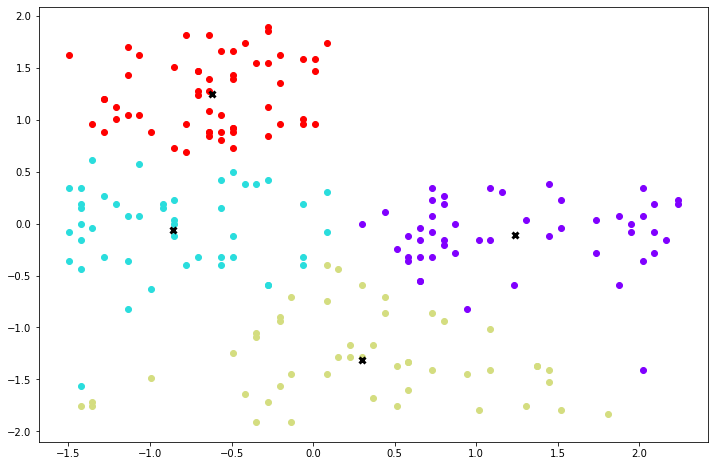

In [15]:
K = 4
centroids, clusters = k_means(data, K)
dist = inertias(clusters, centroids)

fig, ax = plt.subplots(figsize=(12, 8))
color = cm.rainbow(np.linspace(0, 1, K))

for i, cluster in enumerate(clusters):
    for point in cluster:      
        ax.scatter(point[0], point[1], color=color[i])
    
for centroid in centroids:
    ax.scatter(centroid[0], centroid[1], marker="x", color="black", linewidth=3)

### Step 4
<br>
Use scikit-learn's KMeans class to compare your results with the optimized KMeans algrorithm. Compare it for number of clusters between 1-15 and plot the inertias (hint: you can use scikit-learn's "inertia_" parameter.). Comment on your results.  

## Refer to scikit-learn's website for the solution, it is quite straightforward.